In [1]:

import numpy as np
import argparse
import cv2
import imutils

#from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local


In [2]:

import numpy as np
import cv2
 
def order_points(pts):

    rect = np.zeros((4, 2), dtype = "float32")


    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]


    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

In [3]:
def four_point_transform(image, pts):

    rect = order_points(pts)
    (tl, tr, br, bl) = rect


    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))


    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))


    dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]], dtype = "float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))


    return warped

In [14]:
import cv2


image = cv2.imread("bill3.jpg")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
#cv2.imshow("Image", image)
#cv2.imshow("Edged", edged)
cv2.imwrite('edge.jpeg',edged)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

STEP 1: Edge Detection


True

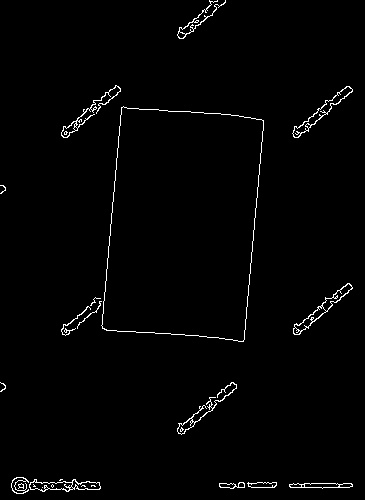

In [15]:
from PIL import Image
Image.open('edge.jpeg')

In [16]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
#if our approximated contour has four points, then we
# can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break
 
# show the contour (outline) of the piece of paper
screenCnt=approx
print("STEP 2: Find contours of paper")
contour=cv2.drawContours(image, approx, -1,(0, 255, 0), 2)
#cv2.imshow("Outline", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
cv2.imwrite("cannyedge.jpeg",contour)

STEP 2: Find contours of paper


True

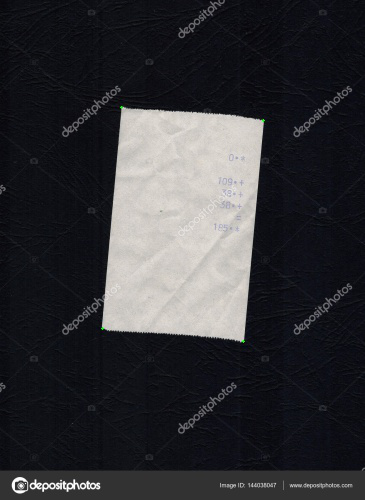

In [17]:
Image.open('cannyedge.jpeg')

In [20]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
 
# show the original and scanned images
print("STEP 3: Apply perspective transform")
#cv2.imshow("Original", imutils.resize(orig, height = 650))
#cv2.imshow("Scanned", imutils.resize(warped, height = 650))
#cv2.waitKey(0)
cv2.imwrite('wrap.jpeg',warped)

STEP 3: Apply perspective transform


True

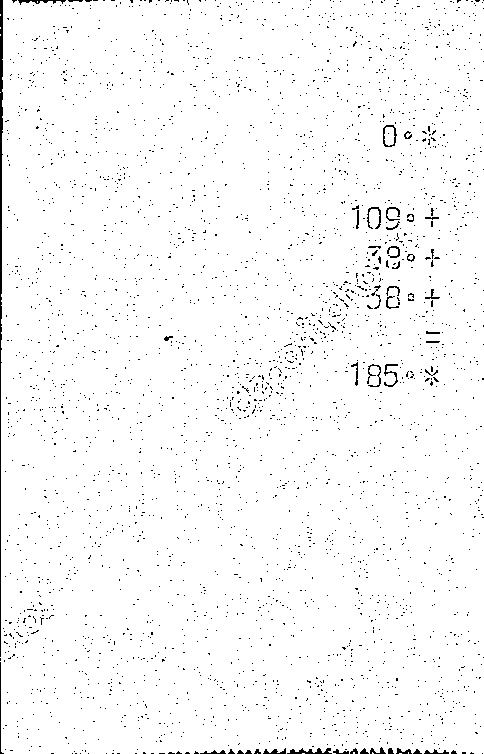

In [21]:
Image.open('wrap.jpeg')